### Biblioteki używane w rozwiązaniu zadań

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps
from scipy.special import roots_legendre
from functools import cache

# Zadanie 1

Aby obliczyć przybliżoną wartość $\pi$ poprzez całkowanie numeryczne, korzystamy z zależności $\int_0^1\frac{4}{1+x^2}dx=\pi$.

In [2]:
def f(x):
    return 4 / (x ** 2 + 1)

# Definiowanie granic całkowania
a = 0
b = 1

Poniżej definiujemy funkcje obliczające powyższą całkę, korzystając ze złożonych kwadratur: prostokątów (otwartej), trapezów i Simpsona.

In [3]:
# Funkcja obliczająca całkę metodą trapezów
def trapezoidal_rule(f, a, b, m):
    x = np.linspace(a, b, m)
    y = f(x)
    return trapz(y, x)

In [4]:
# Funkcja obliczająca całkę metodą Simpsona
def simpsons_rule(f, a, b, m):
    x = np.linspace(a, b, m)
    y = f(x)
    return simps(y, x)

In [5]:
# Funkcja obliczająca całkę metodą midpoint
def midpoint_rule(f, a, b, m):
    h = (b - a) / m
    nodes = np.linspace(a + h / 2, b - h / 2, m)
    return h * np.sum(f(nodes))

Na przedziale całkowania rozmieszczamy $2^m+1$ równoodległych węzłów dla $m=1,2,...,25$. Dla każdej z metod obliczamy także wartość bezwzględną błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej.

In [6]:
def relative_error(approx_val, actual_val):
    return np.abs((actual_val - approx_val) / actual_val)

In [7]:
data = []

# Obliczanie wartości całki dla różnych wartości m i dodawanie ich do listy
for m in range(1, 26):
    midpoint_value = midpoint_rule(f, a, b, 2 ** m + 1)
    trapezoidal_value = trapezoidal_rule(f, a, b, 2 ** m + 1)
    simpsons_value = simpsons_rule(f, a, b, 2 ** m + 1)
    data.append({"m": m, "Midpoint Rule"   : midpoint_value, 
                         "Trapezoidal Rule": trapezoidal_value, 
                         "Simpson's Rule"  : simpsons_value})

Przedstawiamy wyniki na wspólnym wykresie, używając skali logarytmicznej na obu osiach.

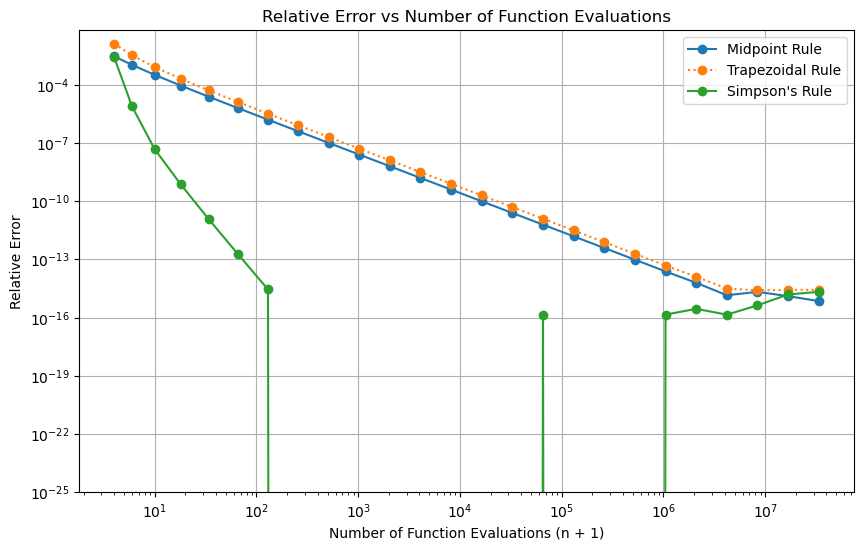

In [8]:
midpoint_errors    = np.array([relative_error(dict["Midpoint Rule"], np.pi) for dict in data])
trapezoidal_errors = np.array([relative_error(dict["Trapezoidal Rule"], np.pi) for dict in data])
simpsons_errors    = np.array([relative_error(dict["Simpson's Rule"], np.pi ) for dict in data])
evaluations        = np.array([(2 ** dict["m"] + 2) for dict in data])

plt.figure(figsize = (10, 6))

plt.plot(evaluations, midpoint_errors, label = "Midpoint Rule", marker = 'o')
plt.plot(evaluations, trapezoidal_errors, label = "Trapezoidal Rule", linestyle = "dotted", marker = 'o')
plt.plot(evaluations, simpsons_errors, label = "Simpson's Rule", marker = 'o')

plt.yscale("log")
plt.xscale("log")
plt.gca().set_ylim([10 ** (-25), None])

plt.xlabel("Number of Function Evaluations (n + 1)")
plt.ylabel("Relative Error")
plt.title("Relative Error vs Number of Function Evaluations")
plt.legend()
plt.grid(True)
plt.show()

W przypadku metody Simpsona dla niektórych z badanych wartości $n$ wartość błędu wynosi 0, przez co nie widać jej na wykresie. Jednakże, przy użyciu opcji *symlog* (zamiast *log* w `plt.yscale()`) wykres staje się o wiele mniej czytelny, dlatego pozostajemy przy takim modelu.

### Wyznaczenie $h_{min}$

Sprawdźmy, czy dla każdej metody istnieje wartość $h_{min}$, dla której wartość bezwzględna błędu względnego przyjmuje minimalną wartość (dalsze zmniejszanie kroku $h$ nie zmniejsza błędu kwadratury). Obliczamy je i przedstawiamy poniżej.

In [9]:
# funkcja licząca h_min dla podanych danych
def h_min(dataList): 
    return 1 / evaluations[np.argmin(dataList)]

In [10]:
print("Midpoint Rule h_min:", h_min(midpoint_errors))
print("Trapezoidal Rule h_min:", h_min(trapezoidal_errors))
print("Simpson's Rule h_min:", h_min(simpsons_errors))

Midpoint Rule h_min: 2.980232061133858e-08
Trapezoidal Rule h_min: 1.192092611290786e-07
Simpson's Rule h_min: 0.003875968992248062


### Empiryczny rząd zbieżności

Empiryczny rząd zbieżności metody $p$ obliczamy dla każdej wartości $m$ ze wzoru $p \approx \frac{log(\frac{E(h_2)}{E(h_1)})}{log(\frac{h_2}{h_1})}$, gdzie $h_1$ i $h_2$ to wartości $h$ dla kolejnych wartości $m$. Do momentu, kiedy mieszczą się one w zakresie, w którym błąd metody przeważa nad błędem numerycznym, wyniki obliczeń mają sens.

In [11]:
# Funkcja licząca empiryczny rząd zbieżności metody
def rate_of_convergence(errs, evals):
    return np.log(errs[1:] / errs[:-1]) / np.log(evals[:-1] / evals[1:])

Przedstawmy empiryczne rzędy zbieżności dla każdej z metod w zależności od wartości $m$.

In [12]:
rate_of_convergence(midpoint_errors, evaluations)

array([ 2.51907288,  2.3012549 ,  2.16400672,  2.08586731,  2.04397892,
        2.02226184,  2.01120048,  2.00561782,  2.00281333,  2.00140774,
        2.00070411,  2.0003523 ,  2.00017673,  2.00008735,  2.00008805,
        2.00004403,  1.99975785,  1.99948283,  2.01486788,  1.94145049,
        2.13750499, -0.5849627 ,  0.73696572,  0.84799698])

In [13]:
rate_of_convergence(trapezoidal_errors, evaluations)

array([ 3.41475228,  2.71374569,  2.35849453,  2.17974635,  2.09001423,
        2.04504478,  2.02253214,  2.01126855,  2.0056349 ,  2.00281761,
        2.00140892,  2.00070417,  2.00035273,  2.00017301,  2.00011282,
        2.00004403,  2.00008806,  1.99500024,  2.00211317,  1.92600207,
        2.03242288,  0.28950672, -0.07800253, -0.        ])

In [14]:
# liczymy dla wyrazów > 0
rate_of_convergence(simpsons_errors[:7], evaluations[:7])

array([14.40310177,  9.92266209,  7.07294318,  6.53905148,  6.27040509,
        6.15800594])

# Zadanie 2

W zadaniu 2 liczymy wartość wspomnianej całki (o której wiemy, że wynosi $\pi$) metodą Gaussa - Legendre'a. Podstawowy wzór w kwadraturach Gaussa to $\int_{-1}^{1}f(\xi)d\xi \approx \sum_{i=0}^nA_if(\xi_i)$, gdzie $\xi_i$ to pierwiastki *i-tego* wielomianu Legendre'a oraz $A_i$ to wagi, które obliczamy później. W naszym przypadku ze względu na przedział [0;1] wzór przybiera postać $\int_0^1f(x)dx \approx \frac{1}{2} \cdot \sum_{i=0}^nA_if(x_i)$ dla $x_i=\frac{1}{2}+\frac{1}{2}\xi_i$ oraz $f(x)=\frac{4}{1+x^2}$.

---

Aby policzyć pierwiastki wielomianu Legendre'a, korzystamy z tego, że $P_0(x)=1$, $P_1(x)=x$ oraz z zależności rekurencyjnej: $P_{i+1}=\frac{2i+1}{i+1}xP_i-\frac{i}{i+1}P_{i-1}$ dla $i \ge 1$.

### Pierwsze podejście - ręczna implementacja

In [15]:
@cache
def legendre_coeffs(i): #obliczanie współczynników wielomianu
    if i == 0:
        return np.array([1])
    elif i == 1:
        return np.array([1, 0])
    else:
        lshift = np.concatenate(((2 * i - 1) / i * legendre_coeffs(i - 1), np.zeros(1)))
        rshift = np.concatenate((np.zeros(2), (i - 1) / i * legendre_coeffs(i - 2)))
        return lshift - rshift

In [16]:
def legendre_roots(n): #obliczanie pierwiastków wielomianu
    coeffs = legendre_coeffs(n)
    return np.roots(coeffs)

In [17]:
def gauss_legendre(A, roots, n): #obliczanie całki metodą Gaussa - Legendre'a
    transform_roots = 0.5 + 0.5 * roots
    return 0.5 * A @ f(transform_roots)

Wagi $A_i$ obliczamy z równania macierzowego $S \cdot A=R$, gdzie $S$ zawiera wyrazy postaci $P_i(x_j)$ dla $i=0,1,...,n-1$ oraz $j=1,2,...,n$, $A$ to kolumna szukanych współczynników, natomiast $R$ to kolumna, gdzie pierwszy wyraz to $\int_a^bw(x)P_0(x)dx$, a pozostałe wyrazy to 0. W przypadku tej kwadratury funkcja wagowa $w(x) \equiv 1$. Wartość tego pierwszego wyrazu sprowadza się do trywialnego $\int_{-1}^11dx=2$ (używamy oryginalnego przedziału [-1;1]).

In [18]:
ns = [5, 10, 50, 100] #przykładowe wartości

for n in ns:
    x = np.flip(np.sort(legendre_roots(n)))

    S = np.array([[np.polyval(legendre_coeffs(i), x[j]) for i in range(n)] for j in range(n)])
    R = np.concatenate((np.array([2]), np.zeros(n - 1)))
    A = np.linalg.solve(S, R)

    value = gauss_legendre(A, x, n)
    print(value)
    
# ???

5.068129197382728
5.1235556207711745
(0.3264146215059429-0.4392298538063953j)
(-2.867405175468693e-07+1.7354849140228927e-07j)


Jak widać, wyniki... mocno odstają od rzeczywistości (a to nie jedyny problem). Szerzej traktujemy o tym w sprawozdaniu. Aby kontynuować dokładną analizę, skorzystamy z funkcji bibliotecznej `scipy.special.roots_legendre`.

### Drugie podejście - funkcja biblioteczna 

Wspomniana funkcja zwraca parę: pierwiastki *n-tego* wielomianu Legendre oraz wektor wag $A$.

In [19]:
ns = [5, 10, 50, 100] #przykładowe wartości

for n in ns:
    roots, A = roots_legendre(n)
    print("Wartość dla n = ", n, ": ", gauss_legendre(A, roots, n), sep = '')

Wartość dla n = 5: 3.141592639884753
Wartość dla n = 10: 3.1415926535900462
Wartość dla n = 50: 3.1415926535897936
Wartość dla n = 100: 3.141592653589794


Tutaj wyniki prezentują się o wiele lepiej. Zakładając, że mamy metodę na której można polegać, postępujemy podobnie jak w zadaniu 1, mianowicie obliczamy wartość bezwzględną błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej. Przyjmujemy mniejszy zakres badanych liczby ewaluacji ze względu na większy koszt obliczeniowy.

In [20]:
errors = []
n = 14

for i in range(1, n):
    roots_i, A_i = roots_legendre(2 ** i)
    
    errors.append(relative_error(gauss_legendre(A_i, roots_i, i), np.pi))

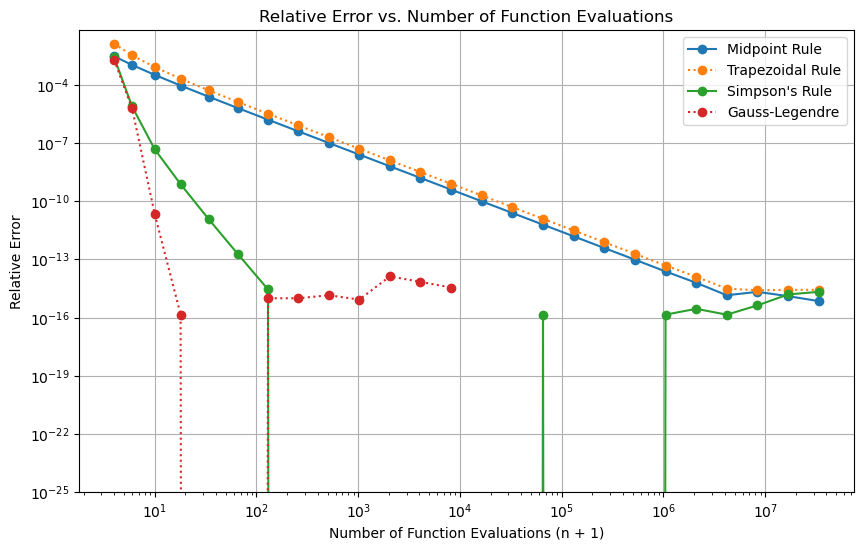

In [21]:
midpoint_errors    = np.array([relative_error(dict["Midpoint Rule"], np.pi) for dict in data])
trapezoidal_errors = np.array([relative_error(dict["Trapezoidal Rule"], np.pi) for dict in data])
simpsons_errors    = np.array([relative_error(dict["Simpson's Rule"], np.pi ) for dict in data])
evaluations        = np.array([(2 ** dict["m"] + 2) for dict in data])

plt.figure(figsize = (10, 6))

plt.plot(evaluations, midpoint_errors, label = "Midpoint Rule", marker = 'o')
plt.plot(evaluations, trapezoidal_errors, label = "Trapezoidal Rule", linestyle = "dotted", marker = 'o')
plt.plot(evaluations, simpsons_errors, label = "Simpson's Rule", marker = 'o')
plt.plot(evaluations[:13], errors, label = "Gauss-Legendre", linestyle = "dotted", marker = 'o')

plt.yscale("log")
plt.xscale("log")
plt.gca().set_ylim([10 ** (-25), None])

plt.xlabel("Number of Function Evaluations (n + 1)")
plt.ylabel("Relative Error")
plt.title("Relative Error vs. Number of Function Evaluations")
plt.legend()
plt.grid(True)
plt.show()